## Digital Technologies and Data-Driven Business
# Mandatory Assignment 1

In the following, you find tasks that need to be solved as part of the first mandatory assignment in Digital Technologies and Data-Driven Business. Once you solved the tasks, please save the .ipynb file (i.e., _File_ >> _Download as_ >> _Notebook (.ipynb)_) and upload the saved file to Canvas. The deadline is __September 30 at 10:00__. Mandatory assignments are either __approved__ or __not approved__. If a mandatory assignment is not approved, you will have the opportunity for a retake. 

Please read the instructions carefully and pay particular attention to the following points:
1. Please provide correct Python code (i.e., code that can be executed without errors).
2. Explain the code you have written in your own words (either with markdown or comments).
3. You may work in groups but your submission must be individual, i.e. you each have to provide a functioning __.ipynb__ file with __your own__ solutions and explanations. Do not copy the answers from others. Answers that are not your own (plagiarized) will lead to the mandatory assignment not being approved.
4. If you get stuck, move to the next question – perhaps it will help you solve an earlier one.

Good luck.

### Week 2 at Airbnb Copenhagen

<img
src = "https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_Bélo.svg" alt="Airbnbn Logo" style="width: 200px;"/>

It is your second week at Airbnb and Annabelle spread the word that you helped her a lot with her presentation. Now, you inbox is flooded with requests. Next up is Timothy. Timothy is a manager within the Data Science department and he really needs your help.

_Hello there!_

_My name is Timothy and I work in the Data Science department._

_I have heard so much about your work and was hoping that you could help me by cleaning up and vizualizing some of our data._

_Please have a look at the file `airbnb_data_needs_cleaning.csv` that I have attached._

## Task 1 (1 point)

Import the necessary modules to read in a pandas DataFrame and read the file named `airbnb_data_needs_cleaning.csv`. Get a first overview of the data we are working with.

In [17]:
# Import the modules here
import pandas as pd
import numpy as np

# Read and inspect the dataset here
df= pd.read_csv('airbnb_data_needs_cleaning-1.csv') 
print(df.isnull().values.any()) 
print(df.isna().sum())
print(df.duplicated())
print(list(df))

True
listing_url                       0
name                              0
description                     195
host_url                          0
host_name                         0
host_since                        0
host_location                     7
host_about                     3073
host_response_time             1907
host_response_rate             1907
host_acceptance_rate            962
host_is_superhost                 0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                        132
beds                             54
amenities                         0
price                             0
minimum_nights         

## Task 2 (4 points)

__Timothy__: _When I received this dataset yesterday from my colleague, I completely forgot to ask him about the included variables and some key stats. So could you maybe pull a quick overview for me that shows the variables in the dataset and gives some info about the data as well?_

_Hint_: There's a neat pandas method that shows lots of useful information about a dataset. Check the pandas documentation. 

In [18]:
# Code goes here
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_url                  7285 non-null   object 
 1   name                         7285 non-null   object 
 2   description                  7090 non-null   object 
 3   host_url                     7285 non-null   object 
 4   host_name                    7285 non-null   object 
 5   host_since                   7285 non-null   object 
 6   host_location                7278 non-null   object 
 7   host_about                   4212 non-null   object 
 8   host_response_time           5378 non-null   object 
 9   host_response_rate           5378 non-null   object 
 10  host_acceptance_rate         6323 non-null   object 
 11  host_is_superhost            7285 non-null   object 
 12  host_total_listings_count    7285 non-null   int64  
 13  host_verifications

__Timothy__: _I can see that some host were too lazy to provide a description for their listings. How many missing values does this column have?_

In [19]:
# Code goes here
#printing the sum of the null values in the column description
print(df['description'].isna().sum())

195


there are 195 missing values

__Timothy__: _Could you please let me know what scales (i.e., nominal, ordinal, interval, or ratio) the following attributes are measured in?_
* `property_type`
* `beds`
* `host_response_time`

Answer goes here

property type is nominal
beds is ratio
host response time is ordinal


__Timothy__: _I can see there's a `price` variable. This is going to be important for our analyses. Can you give me a brief overview of this variable? What are the minimum and maximum prices for an Airbnb in Copenhagen, and what's the mean and the median?_

In [20]:
# Code goes here
print(df['price'].describe())
print(df['price'].median())
print(df['price'].mean())

count     7285.000000
mean      1281.667948
std       1817.734407
min        120.000000
25%        775.000000
50%       1000.000000
75%       1400.000000
max      63234.000000
Name: price, dtype: float64
1000.0
1281.6679478380233


__Timothy__: _Is the distribution of the `price` variable skewed? If yes, positively or negatively? What does this tell us about the prices of listings in Copenhagen?_

Answer goes here

yes it seems to be skewed positively this tells us that the prices in Copenhagen are high compared to the median (because the mean is higher than the median)

## Task 3 (1 point)

__Timothy__: _As we could see above, there are some super high prices in our dataset. I think those hosts are scammers and we should remove them from our database. I think DKK 5,000 might be a good threshold here - can you please remove all the listings that have a price higher than DKK 5,000?_

_Also, please tell me afterwards how many listings you had to remove. All remaining tasks should be solved based on the new dataframe._

In [21]:
# Code goes here
#remove all values above 5000
Cleaned_df = df.drop(df[df['price'] >= 5001].index)
#print the df to make sure no values have exceeded the 5000 limit
print(Cleaned_df['price'].describe())
#print the amount of rows removed
print(f"The amount of removed rows is {df['price'].count()-Cleaned_df['price'].count()}")

count    7202.000000
mean     1168.656623
std       651.153628
min       120.000000
25%       769.000000
50%      1000.000000
75%      1386.000000
max      5000.000000
Name: price, dtype: float64
The amount of removed rows is 83


## Task 4 (2 points)

__Timothy__: _Thanks! We'll get back to the prices in a second. However, now that I look at the data, I'm not happy with the `amenities` column. Right now, this column contains a list including all the amenities this listing has to offer. I think it would be important for our customers to see on a first glance how many amenities the listing they are interested in has. Can you create a new column called `amenities_count` for that?_

In [22]:
#printing the result of index key 1 and counting manually to ensure that my values are correct 
print(df['amenities'][1])

["Room-darkening shades", "Clothing storage: wardrobe", "Oven", "Smoke alarm", "Free washer \u2013 In unit", "Drying rack for clothing", "Coffee maker", "Iron", "Shared garden or backyard", "Hot water kettle", "Cooking basics", "Kitchen", "Smart lock", "Refrigerator", "Dining table", "Dishes and silverware", "Long term stays allowed", "Private patio or balcony", "Wine glasses", "Nespresso machine", "BBQ grill", "Heating", "Waterfront", "Air conditioning", "Essentials", "Conditioner", "Outdoor dining area", "Fast wifi \u2013 425 Mbps", "Barbecue utensils", "Dishwasher", "Free dryer \u2013 In unit", "Hair dryer", "Elevator", "Shower gel", "Fire extinguisher", "Freezer", "Hangers", "Induction stove", "Dedicated workspace", "Microwave", "Single level home", "Cleaning products", "Shampoo", "48\" HDTV", "Sonos Bluetooth sound system", "Outdoor furniture", "Bed linens", "Free parking garage on premises \u2013 1 space", "Body soap", "Hot water"]


In [23]:
# Code goes here
#counting the amount of unique words and placing them in the 'amenities count'
Cleaned_df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')))
#printing the column
print(Cleaned_df['amenities_count'])

0       14
1       50
2       40
3       21
4       23
        ..
7280    19
7281    24
7282    26
7283    29
7284    33
Name: amenities_count, Length: 7202, dtype: int64


__Timothy__: _Oh and also, could you maybe sort the dataframe by the number of amenities, now we have that information? Can you tell me how many amenities the listing with the most amenities has to offer?_

In [24]:
# Code goes here
#sort the values of the data
sorted_df=Cleaned_df.sort_values('amenities_count')
#printing to make sure the list is sorted (not neccessary to leave in)
print(sorted_df['amenities_count'])
#printing the entry with the most amenities
print(Cleaned_df['amenities_count'].nlargest(1))

7202     1
2108     1
6678     1
7142     1
5984     1
        ..
3919    68
57      73
1712    73
1052    76
2257    77
Name: amenities_count, Length: 7202, dtype: int64
2257    77
Name: amenities_count, dtype: int64



The place with the most amenities is entry 2257 with 77 amenities

## Task 5 (2 points)

__Timothy__: _I would expect that an Airbnb is more expensive the more amenities it has to offer. Can you maybe check on that hypothesis by creating a basic scatterplot?_

Hint: pandas has built-in plotting functionalities which are sufficient for basic visualizations. Make sure to assign the x- and y-axis correctly and give the plot a meaningful title.

Bonus: The `seaborn` visualization library allows you to easily plot a fitted line over a scatterplot (i.e., `regplot`) to aid the interpretation.

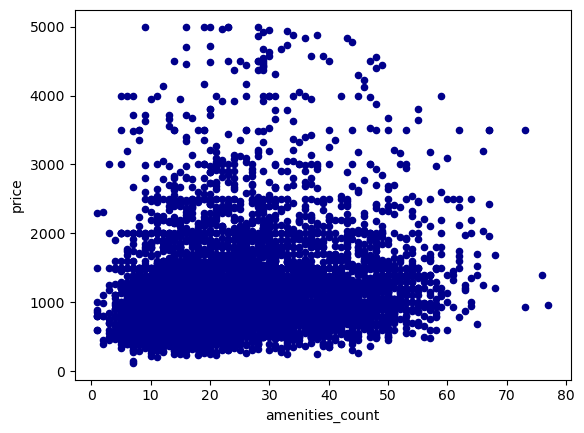

In [25]:
# Code goes here
#using .plot to make a scatter plot
ax1 = sorted_df.plot.scatter(x='amenities_count',
                      y='price',
                      c='DarkBlue')

[Text(0.5, 1.0, 'amenities/price')]

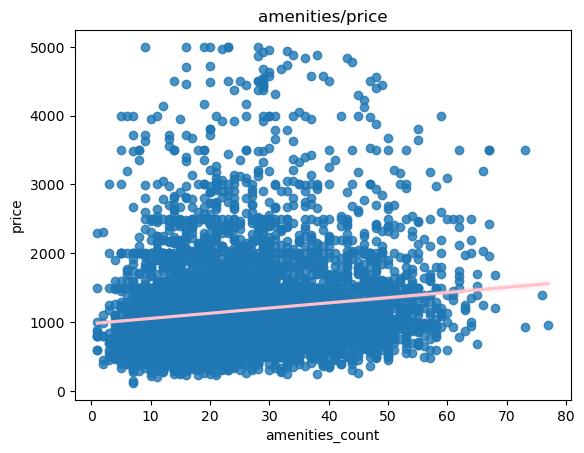

In [32]:
# import the Seaborn library here
import seaborn as sns
# making a regression plot with the sorted data from the dataframe
sns.regplot(data=sorted_df, x='amenities_count', y= 'price', line_kws={"color": "pink"} ).set(title='amenities/price')



__Timothy__: _What would you say - did my hypothesis hold true? Why or why not?_




You can see that you hypothesis is not entirely true as many of the high amenity listings are firmly below the fitted line.
Many of the low amenity listings are above the fitted line so there seems to be something different that determines values.

## Task 6 (1 point)

__Timothy__: _Well, it looks like other variables have a influence on the price as well. Maybe we should check out the property type - I could imagine that this plays a key role in determining the price of a listing. Can you find out the average price for every property type for me?_

In [54]:
# Code goes here
#grouping all property types and calculating mean using the mean() method
average_price_by_property_type = Cleaned_df.groupby('property_type')['price'].mean()
sorted=average_price_by_property_type.sort_values(ascending=False)
print(sorted)

property_type
Room in boutique hotel               2729.000000
Room in hotel                        2680.000000
Barn                                 2531.000000
Private room in bed and breakfast    2000.000000
Houseboat                            1983.083333
Private room in hostel               1889.000000
Boat                                 1756.600000
Entire serviced apartment            1618.662963
Entire place                         1600.000000
Entire townhouse                     1544.178404
Entire villa                         1521.400000
Entire loft                          1403.634615
Entire home                          1347.942350
Entire cottage                       1278.666667
Room in hostel                       1124.444444
Entire condo                         1120.493296
Entire rental unit                   1118.215241
Entire cabin                         1093.666667
Entire bungalow                      1058.625000
Tiny home                             852.375000
Entire

__Timothy__: _Which property types have the highest and lowest average price?_

Room in boutique hotel has the highest average at 2729 and private room in townhouse has the lowest average at 415

## Task 7 (2 points)

__Timothy__: _This is super useful information, thanks! I would like to have that visualized as well. Can you maybe build a simple plot for me that visualizes the average prices per property type? However, I've already seen enough scatterplots for today, so please think of another type of plot. And, lastly - I know I'm demanding - please sort the property types by price._

<Axes: xlabel='price', ylabel='property_type'>

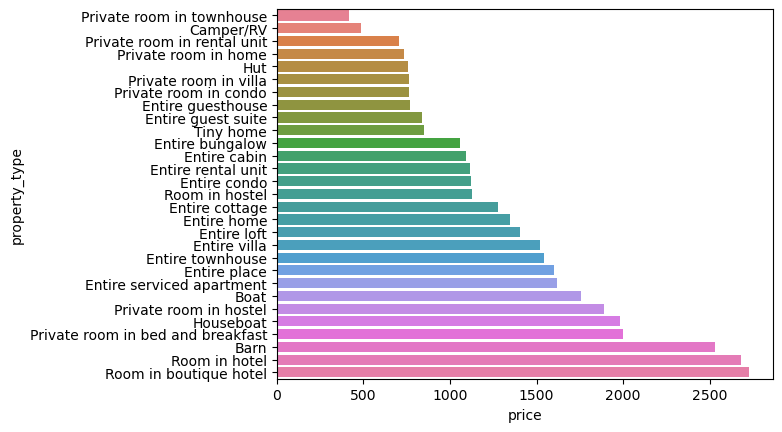

In [55]:
# Code goes here

#turning the average price series into a dataframe
sortedavpr=average_price_by_property_type.sort_values()
avgpricedf = sortedavpr.to_frame()

#making a new plot
sns.barplot(data=avgpricedf, x="price",y="property_type", hue="property_type")


## Task 8 (2 points)

__Timothy__: _At Airbnb, we are currently thinking about grouping the listings we have into four different price categories: `Budget`, `Moderate`, `Premium` and `Luxury`. Users could select the category they are looking for and then only see the according listings. Our idea is that every quartile of the price distribution should constitute one category. Can you determine the quartile thresholds and then assign each listing to its price category?_

Hint: Create a new column in the dataframe called `price_category` for this. 

In [29]:
#printing the describe to get a look at the quartile thresholds
print(Cleaned_df['price'].describe())

count    7202.000000
mean     1168.656623
std       651.153628
min       120.000000
25%       769.000000
50%      1000.000000
75%      1386.000000
max      5000.000000
Name: price, dtype: float64


In [30]:
# Code goes here
def Categorymaker(Price):
    if Price <= 768:
        return 'Budget'
    elif Price <= 1000:
        return 'Moderate'
    elif Price <= 1380:
        return 'Premium'
    else:
        return 'Luxury'

# Apply the function to create the 'price_category' column
Cleaned_df['price_category'] = Cleaned_df['price'].apply(Categorymaker)

# Displaying the updated DataFrame with the new 'price_category' column
print(Cleaned_df[['price_category', 'price']].head(10))

  price_category  price
0         Luxury   2800
1       Moderate   1000
2        Premium   1200
3         Luxury   1471
4       Moderate    800
5        Premium   1200
6         Luxury   1500
7       Moderate    800
8         Budget    650
9        Premium   1157


## Task 9 (2 points)

__Timothy__: _I know I know, I've bugged you enough, but there's one last thing you could do for me. It would be super convenient for me if I could just plug in these four price categories into some type of function maybe and get info about the number of listings inside that category as well as the min., max., and avg. prices in these categories. Can you provide me with such a function?_

Hint: The function should take a price category as a parameter and return the info requested by Timothy. For the A+ answer, you also might want to handle cases in which an invalid price category was given.

In [31]:
# Code goes here
def Listingfinder(category):
    # Normalize category input (ignore case sensitivity)
    category = category.capitalize()
    
    # Validate the category using if statements
    if category == 'Budget' or 'budget':
        valid = True
    elif category == 'Moderate' or 'moderate':
        valid = True
    elif category == 'Premium' or 'premium':
        valid = True
    elif category == 'Luxury'or'luxury':
        valid = True
    else:
        valid = False
    
    # If the category is not valid print an error message
    if not valid:
        print("Invalid category! Please choose from: Budget, Moderate, Premium, Luxury")
        return

    # Filter DataFrame for category
    filtered_df = Cleaned_df[Cleaned_df['price_category'] == category]
    
    # If no listings are found in category
    if filtered_df.empty:
        print("No listings found in the '" + category + "' category.")
        return
    
    # Calculate statistics for category
    count = len(filtered_df)
    min_price = filtered_df['price'].min()
    max_price = filtered_df['price'].max()
    avg_price = filtered_df['price'].mean()

    # Print category information
    print("Category:",category)
    print("Number of listings:", str(count))
    print("Min price: $", str(round(min_price, 2)))
    print("Max price:", str(round(max_price, 2)))
    print("Average price:",str(round(avg_price, 2)))

# Main logic for accepting input
while True:
    category = input("Input your preferred price category (Budget, Moderate, Premium, Luxury): ")
    
    # Check validity using if statements
    if category.capitalize() in ['Budget', 'Moderate', 'Premium', 'Luxury']:
        Listingfinder(category)
        break  # Exit loop after successful input and function call
    else:
        print("Oops! That is not a valid price category. Try again.")

Category: Budget
Number of listings: 1799
Min price: $ 120
Max price: 766
Average price: 605.0
